<a href="https://colab.research.google.com/github/ch1oelewis/Renewind-Project/blob/main/Rideshare_customization_project_GPCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generating Social Responsibility Through In-App Customization for Rideshare Customers
Keywords: Sharing Economy, Rideshare, User Interface, Psychological Ownership,
Prosocial Behavior

1.      Research Question
How does platform customization affect psychological ownership that affects prosocial behavior in the consumer?




Column names:

Status                           
Progress                          
Duration (in seconds)             
Finished                       
LocationLatitude                
LocationLongitude               
DistributionChannel     
UserLanguage             

Check_App      - How much customization over  
                 app interface         
Check_Exp      - How much customization over
                 rideexperience                     
DV_StartConvo  - Likelihood participant engages
                 in a conversation.             
DV_KeepConvo   - participant maintains
                 conversation.                
DV_Tip         - Willingness to tip       
                 driver.                      

DV_Trash      - Willingness to pick up trash

DV_Spill      - Willingness to clean up a  
                spill.      


DV_Door       - Shut door gently.
                
Own_Control_Car   - User felt control over  
                  their experience in the car.    

Own_Know_Car    - user felt knowledgeable about
                car and driver.     

Own_Inv_Car     - user felt invested in the   
                experience of the ride.     
             
Own_Control_App    - control user felt over app
                  interface.   

Own_Know_App     - knowledge about app and
                 features available on the app.   

Own_Inv_App      - How much user felt app
                 reflects them as a person.       

Age             - age participant.

Gender          - gender participant

QID7_3_TEXT     - other gender

Income          - different options for income

Addtl_Comments           

Assigned_Scenario   - control app, treatment
                      app, moderator exp, treatment exp,    

Treatment           - 0 for control, 1 for
                     treatment

Mod_Platform        -  1 platform, 0 experience moderator.

# Data Overview

Loading data and packages

In [ ]:
!pip install pandas numpy matplotlib seaborn --quiet
!pip install scikit-learn imbalanced-learn xgboost threadpoolctl --quiet

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

#to read csv from a computer file
import pandas as pd

rideshare = pd.read_csv('rideshare_cleaned.csv') #read data

Saving rideshare_cleaned.csv to rideshare_cleaned.csv


In [ ]:
#creating a copy
rideshare = rideshare.copy()

In [ ]:
rideshare.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Check_App,Check_Exp,DV_StartConvo,DV_KeepConvo,DV_Tip,DV_Trash,DV_Spill,DV_Door,Own_Control_Car,Own_Know_Car,Own_Inv_Car,Own_Control_App,Own_Know_App,Own_Inv_App,Age,Gender,QID7_3_TEXT,Income,Addtl_Comments,Assigned_Scenario,Treatment,Mod_Platform,Mod_Exp
0,4/13/2025 12:40,4/13/2025 12:41,0,99.71.132.125,100,68,1,4/13/2025 12:41,R_65XfoXZqoROnxR1,NaN,NaN,NaN,NaN,33.934,-117.885,anonymous,EN,5,4,2,3,3,5,5,5,5,4,4,5,3,3,36,2,NaN,2,NaN,3,1,0,1
1,4/13/2025 12:40,4/13/2025 12:41,0,99.165.108.247,100,74,1,4/13/2025 12:41,R_6esNA68MHHrTt8t,NaN,NaN,NaN,NaN,38.752,-90.304,anonymous,EN,5,2,3,2,4,7,7,7,7,4,3,5,6,4,18,2,NaN,4,NaN,2,1,1,0
2,4/13/2025 12:40,4/13/2025 12:42,0,73.29.231.228,100,94,1,4/13/2025 12:42,R_7lhMRUFiIKb0dbb,NaN,NaN,NaN,NaN,40.332,-74.055,anonymous,EN,2,2,1,7,4,7,7,7,4,4,4,2,6,1,29,1,NaN,2,NaN,1,0,0,1
3,4/13/2025 12:40,4/13/2025 12:42,0,76.32.49.8,100,113,1,4/13/2025 12:42,R_3fjirX3ErqqsTk6,NaN,NaN,NaN,NaN,34.155,-118.596,anonymous,EN,3,3,3,4,4,1,7,7,3,3,3,3,3,1,46,2,NaN,7,NaN,0,0,1,0
4,4/13/2025 12:40,4/13/2025 12:42,0,108.18.248.146,100,115,1,4/13/2025 12:42,R_6H1sicdZWj45Nu0,NaN,NaN,NaN,NaN,38.862,-77.266,anonymous,EN,1,1,2,2,4,4,7,7,4,6,4,1,5,1,46,1,NaN,6,NaN,1,0,0,1


In [ ]:
rideshare.tail()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Check_App,Check_Exp,DV_StartConvo,DV_KeepConvo,DV_Tip,DV_Trash,DV_Spill,DV_Door,Own_Control_Car,Own_Know_Car,Own_Inv_Car,Own_Control_App,Own_Know_App,Own_Inv_App,Age,Gender,QID7_3_TEXT,Income,Addtl_Comments,Assigned_Scenario,Treatment,Mod_Platform,Mod_Exp
308,4/13/2025 13:49,4/13/2025 13:52,0,50.159.24.228,100,162,1,4/13/2025 13:52,R_3y96pmZiF4UlkPr,NaN,NaN,NaN,NaN,36.204,-115.225,anonymous,EN,5,5,4,4,3,3,3,3,5,3,4,5,5,3,19,1,NaN,6,NaN,3,1,0,1
309,4/13/2025 13:49,4/13/2025 13:52,0,68.70.136.107,100,155,1,4/13/2025 13:52,R_5bVSvZwcT5I9pMI,NaN,NaN,NaN,NaN,47.028,-88.525,anonymous,EN,5,4,7,7,6,5,7,7,5,4,4,5,5,2,61,1,NaN,3,NaN,1,0,0,1
310,4/13/2025 13:52,4/13/2025 13:54,0,72.189.164.72,100,83,1,4/13/2025 13:54,R_7Yb8YcwOyWd0S7K,NaN,NaN,NaN,NaN,28.041,-82.395,anonymous,EN,5,5,6,6,4,7,7,7,5,5,5,5,5,3,21,2,NaN,6,NaN,2,1,1,0
311,4/13/2025 13:52,4/13/2025 13:54,0,99.5.105.170,100,123,1,4/13/2025 13:54,R_1DEQwZp1bZv2W8V,NaN,NaN,NaN,NaN,29.754,-95.359,anonymous,EN,5,5,5,6,4,3,6,6,6,5,5,5,5,5,54,1,NaN,3,NaN,1,0,0,1
312,4/13/2025 13:56,4/13/2025 13:59,0,129.108.202.183,100,207,1,4/13/2025 13:59,R_3AlxsUTs6by8pxL,NaN,NaN,NaN,NaN,31.838,-106.538,anonymous,EN,6,7,4,7,6,4,7,7,6,5,6,7,7,3,24,1,NaN,2,NaN,3,1,0,1


In [ ]:
rideshare.shape

(313, 40)

In [ ]:
#tracing null values and other missing values
nullvalues= rideshare.isnull().sum()
print(nullvalues)

StartDate                  0
EndDate                    0
Status                     0
IPAddress                  0
Progress                   0
Duration (in seconds)      0
Finished                   0
RecordedDate               0
ResponseId                 0
RecipientLastName        313
RecipientFirstName       313
RecipientEmail           313
ExternalReference        313
LocationLatitude           0
LocationLongitude          0
DistributionChannel        0
UserLanguage               0
Check_App                  0
Check_Exp                  0
DV_StartConvo              0
DV_KeepConvo               0
DV_Tip                     0
DV_Trash                   0
DV_Spill                   0
DV_Door                    0
Own_Control_Car            0
Own_Know_Car               0
Own_Inv_Car                0
Own_Control_App            0
Own_Know_App               0
Own_Inv_App                0
Age                        0
Gender                     0
QID7_3_TEXT              309
Income        

Data is correctly inputted for all rows, QID7_3_TEXT and Addtl_Comments have null values most likely because they are open ended text columns so I imagine participants had things to write.

In [ ]:
rideshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StartDate              313 non-null    object 
 1   EndDate                313 non-null    object 
 2   Status                 313 non-null    int64  
 3   IPAddress              313 non-null    object 
 4   Progress               313 non-null    int64  
 5   Duration (in seconds)  313 non-null    int64  
 6   Finished               313 non-null    int64  
 7   RecordedDate           313 non-null    object 
 8   ResponseId             313 non-null    object 
 9   RecipientLastName      0 non-null      float64
 10  RecipientFirstName     0 non-null      float64
 11  RecipientEmail         0 non-null      float64
 12  ExternalReference      0 non-null      float64
 13  LocationLatitude       313 non-null    float64
 14  LocationLongitude      313 non-null    float64
 15  Distri

In [ ]:
rideshare = rideshare.convert_dtypes()
print(rideshare.dtypes)


StartDate                string[python]
EndDate                  string[python]
Status                            Int64
IPAddress                string[python]
Progress                          Int64
Duration (in seconds)             Int64
Finished                          Int64
RecordedDate             string[python]
ResponseId               string[python]
RecipientLastName                 Int64
RecipientFirstName                Int64
RecipientEmail                    Int64
ExternalReference                 Int64
LocationLatitude                Float64
LocationLongitude               Float64
DistributionChannel      string[python]
UserLanguage             string[python]
Check_App                         Int64
Check_Exp                         Int64
DV_StartConvo                     Int64
DV_KeepConvo                      Int64
DV_Tip                            Int64
DV_Trash                          Int64
DV_Spill                          Int64
DV_Door                           Int64


In [ ]:
#dropping columns that will not be very useful for analysis
cols_to_drop = [
    'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
    'ResponseId', 'IPAddress', 'StartDate', 'EndDate', 'RecordedDate'
    # Add 'QID7_3_TEXT', 'Addtl_Comments' if not needed for text analysis
]

rideshare = rideshare.drop(cols_to_drop, axis=1)



In [ ]:
rideshare = rideshare.convert_dtypes()
print(rideshare.dtypes)

Status                            Int64
Progress                          Int64
Duration (in seconds)             Int64
Finished                          Int64
LocationLatitude                Float64
LocationLongitude               Float64
DistributionChannel      string[python]
UserLanguage             string[python]
Check_App                         Int64
Check_Exp                         Int64
DV_StartConvo                     Int64
DV_KeepConvo                      Int64
DV_Tip                            Int64
DV_Trash                          Int64
DV_Spill                          Int64
DV_Door                           Int64
Own_Control_Car                   Int64
Own_Know_Car                      Int64
Own_Inv_Car                       Int64
Own_Control_App                   Int64
Own_Know_App                      Int64
Own_Inv_App                       Int64
Age                               Int64
Gender                            Int64
QID7_3_TEXT              string[python]


In [ ]:
rideshare.head()

,Status,Progress,Duration (in seconds),Finished,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Check_App,Check_Exp,DV_StartConvo,DV_KeepConvo,DV_Tip,DV_Trash,DV_Spill,DV_Door,Own_Control_Car,Own_Know_Car,Own_Inv_Car,Own_Control_App,Own_Know_App,Own_Inv_App,Age,Gender,QID7_3_TEXT,Income,Addtl_Comments,Assigned_Scenario,Treatment,Mod_Platform,Mod_Exp
0,0,100,68,1,33.934,-117.885,anonymous,EN,5,4,2,3,3,5,5,5,5,4,4,5,3,3,36,2,<NA>,2,<NA>,3,1,0,1
1,0,100,74,1,38.752,-90.304,anonymous,EN,5,2,3,2,4,7,7,7,7,4,3,5,6,4,18,2,<NA>,4,<NA>,2,1,1,0
2,0,100,94,1,40.332,-74.055,anonymous,EN,2,2,1,7,4,7,7,7,4,4,4,2,6,1,29,1,<NA>,2,<NA>,1,0,0,1
3,0,100,113,1,34.155,-118.596,anonymous,EN,3,3,3,4,4,1,7,7,3,3,3,3,3,1,46,2,<NA>,7,<NA>,0,0,1,0
4,0,100,115,1,38.862,-77.266,anonymous,EN,1,1,2,2,4,4,7,7,4,6,4,1,5,1,46,1,<NA>,6,<NA>,1,0,0,1


assigned scenario:

0 - control moderator: platform (no customization)
    

1 - control moderator : experience (no customization)

2 - Treatment Moderator Platform (customization)

3 - Treatment Moderator Experience (customization of ride experience, lighting, music, temp)

In [ ]:
#summary of the dataset
rideshare.describe().T

,count,mean,std,min,25%,50%,75%,max
Status,313.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Progress,313.000,100.000,0.000,100.000,100.000,100.000,100.000,100.000
Duration (in seconds),313.000,197.661,155.739,34.000,119.000,157.000,220.000,1343.000
Finished,313.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
LocationLatitude,313.000,38.237,5.947,21.327,33.998,39.040,41.883,53.481
LocationLongitude,313.000,-88.783,22.837,-157.862,-97.822,-85.965,-78.036,1.023
Check_App,313.000,4.150,1.810,1.000,3.000,5.000,5.000,7.000
Check_Exp,313.000,4.262,1.833,1.000,3.000,4.000,6.000,7.000
DV_StartConvo,313.000,3.335,1.817,1.000,2.000,3.000,5.000,7.000
DV_KeepConvo,313.000,4.163,1.753,1.000,3.000,4.000,5.000,7.000


comments regarding these numbers:

In [ ]:
#ideas for testing, ANOVA, compare means across all four groups to detect any significant differences.

## Pre-processing and Assumptions

Sorting by different scenarios:

assigned scenario:

0 - control moderator: platform (no customization)
    

1 - control moderator : experience (no customization)

2 - Treatment Moderator Platform (customization)

3 - Treatment Moderator Experience (customization of ride experience, lighting, music, temp)

In [ ]:
grouped = rideshare.groupby('Assigned_Scenario')

# Example: Get mean of numeric columns by scenario
means = grouped.mean(numeric_only=True)
print(means)


                   Status  Progress  Duration (in seconds)  Finished  \
Assigned_Scenario                                                      
0                   0.000   100.000                170.526     1.000   
1                   0.000   100.000                188.949     1.000   
2                   0.000   100.000                246.350     1.000   
3                   0.000   100.000                183.390     1.000   

                   LocationLatitude  LocationLongitude  Check_App  Check_Exp  \
Assigned_Scenario                                                              
0                            38.043            -87.852      3.103      3.513   
1                            38.727            -89.039      3.782      3.821   
2                            39.020            -89.851      5.062      3.888   
3                            37.122            -88.355      4.636      5.857   

                   DV_StartConvo  DV_KeepConvo  DV_Tip  DV_Trash  DV_Spill  \
Assigned

test significance of ownership of control app, knowl of app, ownership control car,

In [ ]:
#mapping to create descriptive labels for each variable to aid presentation

mapping_dict = {
    0: 'Control Moderator: Platform (No Customization)',
    1: 'Control Moderator: Experience (No Customization)',
    2: 'Treatment Moderator: Platform (Customization)',
    3: 'Treatment Moderator: Experience (Customization)'
}

# Apply mapping
rideshare['Scenario_Description'] = rideshare['Assigned_Scenario'].map(mapping_dict)


In [ ]:
rideshare.head()

,Status,Progress,Duration (in seconds),Finished,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Check_App,Check_Exp,DV_StartConvo,DV_KeepConvo,DV_Tip,DV_Trash,DV_Spill,DV_Door,Own_Control_Car,Own_Know_Car,Own_Inv_Car,Own_Control_App,Own_Know_App,Own_Inv_App,Age,Gender,QID7_3_TEXT,Income,Addtl_Comments,Assigned_Scenario,Treatment,Mod_Platform,Mod_Exp,Scenario_Description
0,0,100,68,1,33.934,-117.885,anonymous,EN,5,4,2,3,3,5,5,5,5,4,4,5,3,3,36,2,<NA>,2,<NA>,3,1,0,1,Treatment Moderator: Experience (Customization)
1,0,100,74,1,38.752,-90.304,anonymous,EN,5,2,3,2,4,7,7,7,7,4,3,5,6,4,18,2,<NA>,4,<NA>,2,1,1,0,Treatment Moderator: Platform (Customization)
2,0,100,94,1,40.332,-74.055,anonymous,EN,2,2,1,7,4,7,7,7,4,4,4,2,6,1,29,1,<NA>,2,<NA>,1,0,0,1,Control Moderator: Experience (No Customization)
3,0,100,113,1,34.155,-118.596,anonymous,EN,3,3,3,4,4,1,7,7,3,3,3,3,3,1,46,2,<NA>,7,<NA>,0,0,1,0,Control Moderator: Platform (No Customization)
4,0,100,115,1,38.862,-77.266,anonymous,EN,1,1,2,2,4,4,7,7,4,6,4,1,5,1,46,1,<NA>,6,<NA>,1,0,0,1,Control Moderator: Experience (No Customization)


make bar graphs for experience and platform, divide by pages on qualitrics and make

# EDA

## User Interface/Platform

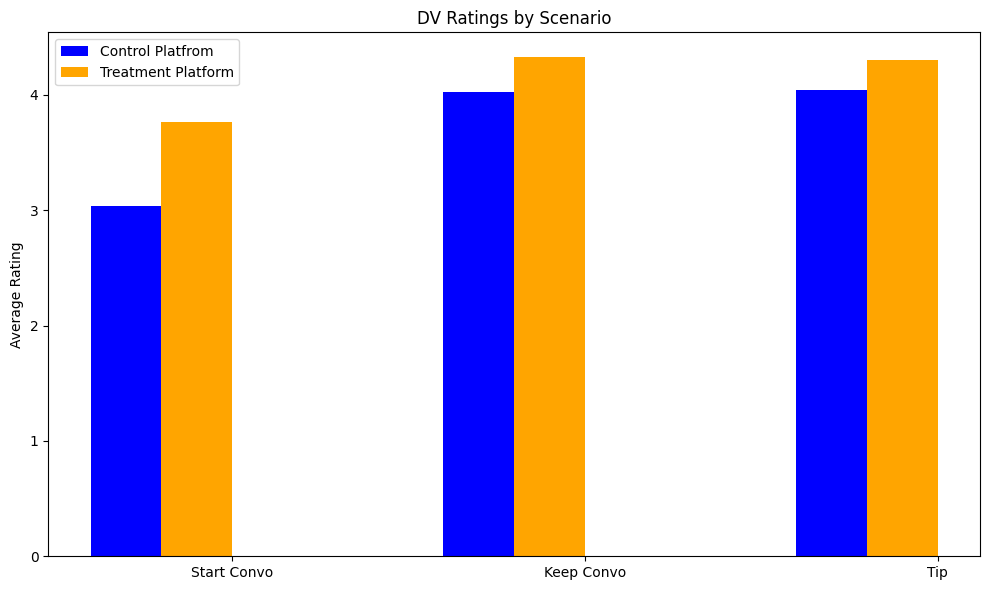

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data structure (replace with your aggregated data)
dvs = ['Start Convo', 'Keep Convo', 'Tip']
control = [3.038, 4.026, 4.038]  # Mean ratings for control group across DVs
treatment = [3.763, 4.325, 4.300]  # Mean ratings for treatment group


x = np.arange(len(dvs))  # X-axis positions for DVs
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each scenario
ax.bar(x - 1.5*width, control, width, label='Control Platfrom', color='blue')
ax.bar(x - 0.5*width, treatment, width, label='Treatment Platform', color='orange')


# Formatting
ax.set_xticks(x)
ax.set_xticklabels(dvs)
ax.set_ylabel('Average Rating')
ax.set_title('DV Ratings by Scenario')
ax.legend()
plt.tight_layout()
plt.show()


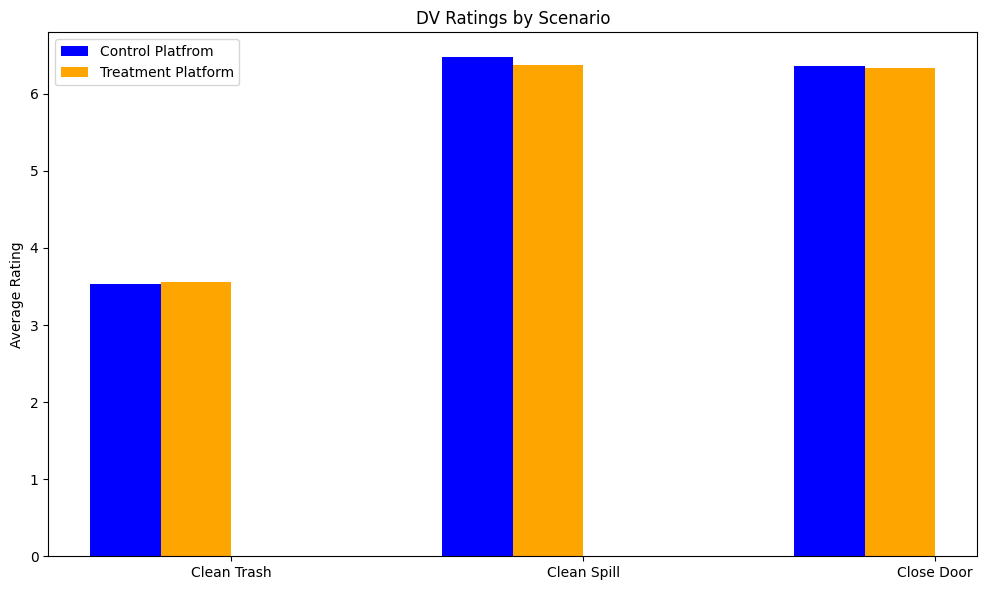

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data structure (replace with your aggregated data)
dvs = ['Clean Trash', 'Clean Spill', 'Close Door']
control = [3.538, 6.474, 6.359]  # Mean ratings for control group across DVs
treatment = [3.562, 6.375, 6.338]  # Mean ratings for treatment group


x = np.arange(len(dvs))  # X-axis positions for DVs
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each scenario
ax.bar(x - 1.5*width, control, width, label='Control Platfrom', color='blue')
ax.bar(x - 0.5*width, treatment, width, label='Treatment Platform', color='orange')


# Formatting
ax.set_xticks(x)
ax.set_xticklabels(dvs)
ax.set_ylabel('Average Rating')
ax.set_title('DV Ratings by Scenario')
ax.legend()
plt.tight_layout()
plt.show()

The differences between control and treatment for these subsets of questions was more negligible than the first set of questions. These were the questions assigned to control and treatment groups who were limited to the platfrom.

### Psycological Ownership/Platform

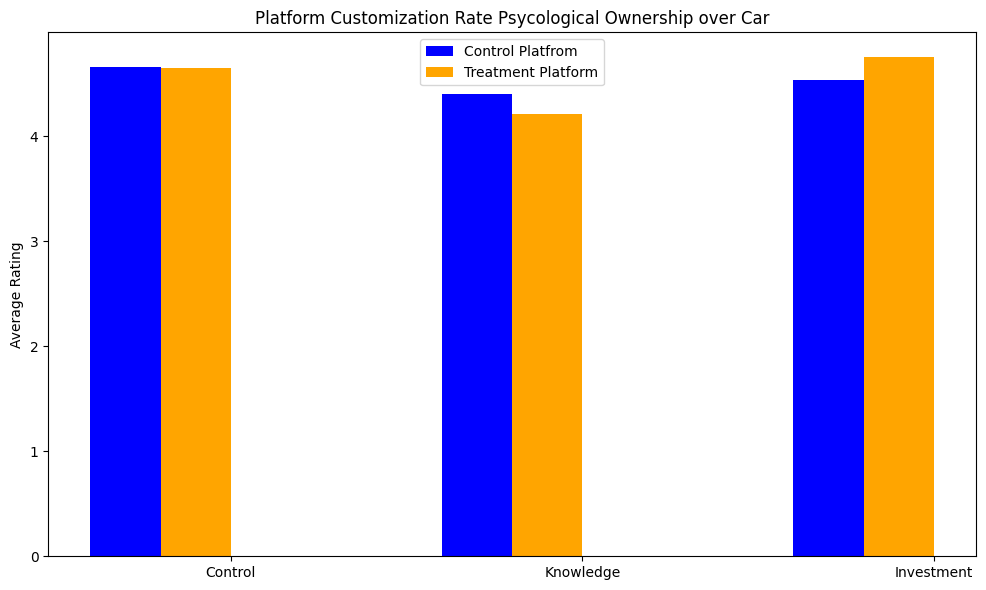

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data structure (replace with your aggregated data)
dvs = ['Control', 'Knowledge', 'Investment']
control = [4.654, 4.397, 4.538]  # Mean ratings for control group across DVs
treatment = [4.650, 4.213, 4.750]  # Mean ratings for treatment group


x = np.arange(len(dvs))  # X-axis positions for DVs
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each scenario
ax.bar(x - 1.5*width, control, width, label='Control Platfrom', color='blue')
ax.bar(x - 0.5*width, treatment, width, label='Treatment Platform', color='orange')


# Formatting
ax.set_xticks(x)
ax.set_xticklabels(dvs)
ax.set_ylabel('Average Rating')
ax.set_title('Platform Customization Rate Psycological Ownership over Car')
ax.legend()
plt.tight_layout()
plt.show()

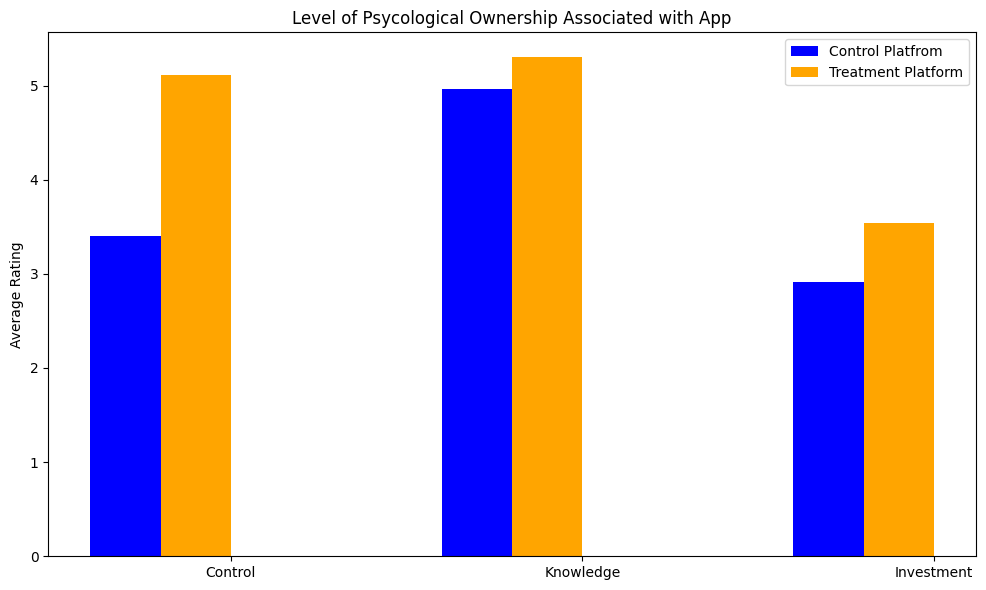

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data structure (replace with your aggregated data)
dvs = ['Control', 'Knowledge', 'Investment']
control = [3.397, 4.962, 2.910]  # Mean ratings for control group across DVs
treatment = [5.112, 5.300, 3.538]  # Mean ratings for treatment group


x = np.arange(len(dvs))  # X-axis positions for DVs
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each scenario
ax.bar(x - 1.5*width, control, width, label='Control Platfrom', color='blue')
ax.bar(x - 0.5*width, treatment, width, label='Treatment Platform', color='orange')


# Formatting
ax.set_xticks(x)
ax.set_xticklabels(dvs)
ax.set_ylabel('Average Rating')
ax.set_title('Level of Psycological Ownership Associated with App')
ax.legend()
plt.tight_layout()
plt.show()

## Experience

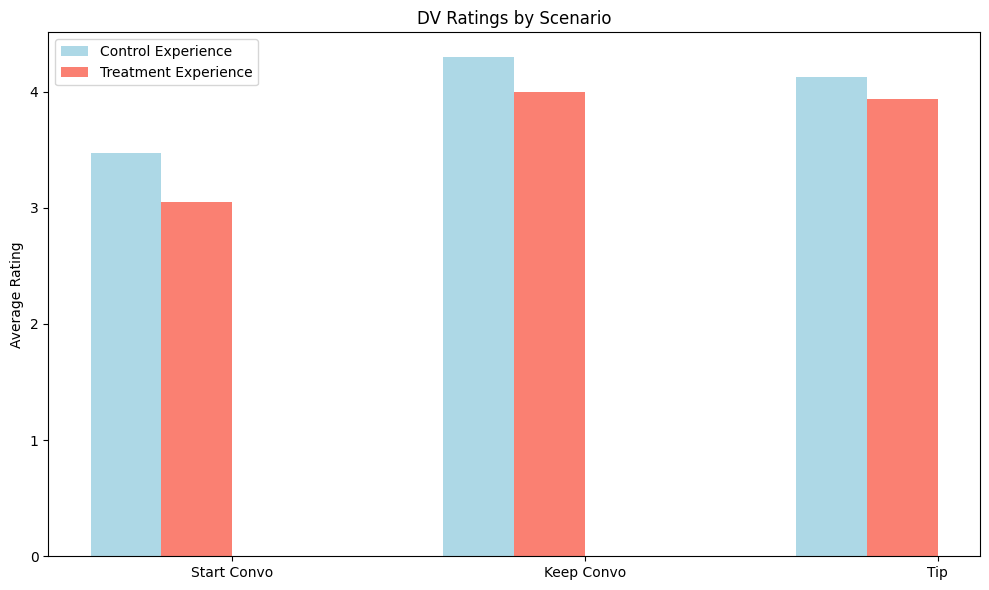

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data structure (replace with your aggregated data)
dvs = ['Start Convo', 'Keep Convo', 'Tip']
control = [3.474, 4.295, 4.128]  # Mean ratings for control group across DVs
treatment = [3.052, 4.00, 3.935]  # Mean ratings for treatment group


x = np.arange(len(dvs))  # X-axis positions for DVs
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each scenario
ax.bar(x - 1.5*width, control, width, label='Control Experience', color='lightblue')
ax.bar(x - 0.5*width, treatment, width, label='Treatment Experience', color='salmon')


# Formatting
ax.set_xticks(x)
ax.set_xticklabels(dvs)
ax.set_ylabel('Average Rating')
ax.set_title('DV Ratings by Scenario')
ax.legend()
plt.tight_layout()
plt.show()

A few things I noticed, the control group for experience was on average more likely to engage in prosocial behavior than the control group for platform. I also noticed that platform treatment group on average rated lower than their respective control group however after adding the moderator, our treatment group for experience rated lower than the control group for experience.

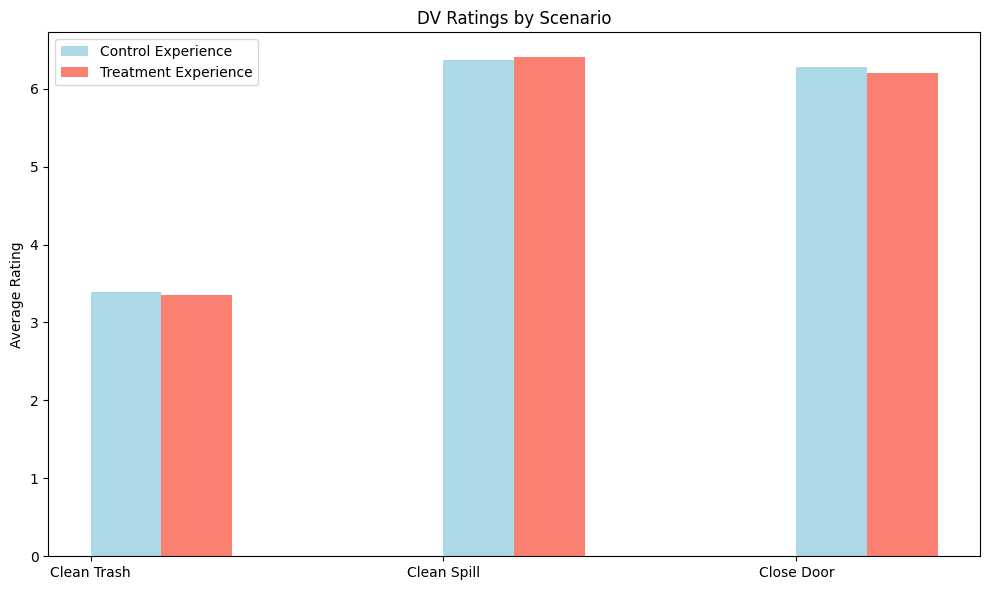

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data structure (replace with your aggregated data)
dvs = ['Clean Trash', 'Clean Spill', 'Close Door']

control_mod = [3.385, 6.372, 6.282]  # Control moderator
treatment_mod = [3.351, 6.403, 6.195]  # Treatment moderator

x = np.arange(len(dvs))  # X-axis positions for DVs
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each scenario
ax.bar(x + 0.5*width, control_mod, width, label='Control Experience', color='lightblue')
ax.bar(x + 1.5*width, treatment_mod, width, label='Treatment Experience', color='salmon')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(dvs)
ax.set_ylabel('Average Rating')
ax.set_title('DV Ratings by Scenario')
ax.legend()
plt.tight_layout()
plt.show()

There's a similar trend here to the first set of control and treatment where the differences between control and treatments ratings are almost negligible, but once again the treatment group was typically (apart from spill) rated lower than control. My last observation is that participants average ratings for cleaning up a spill were pretty high.

### Psycological Ownership / Experience

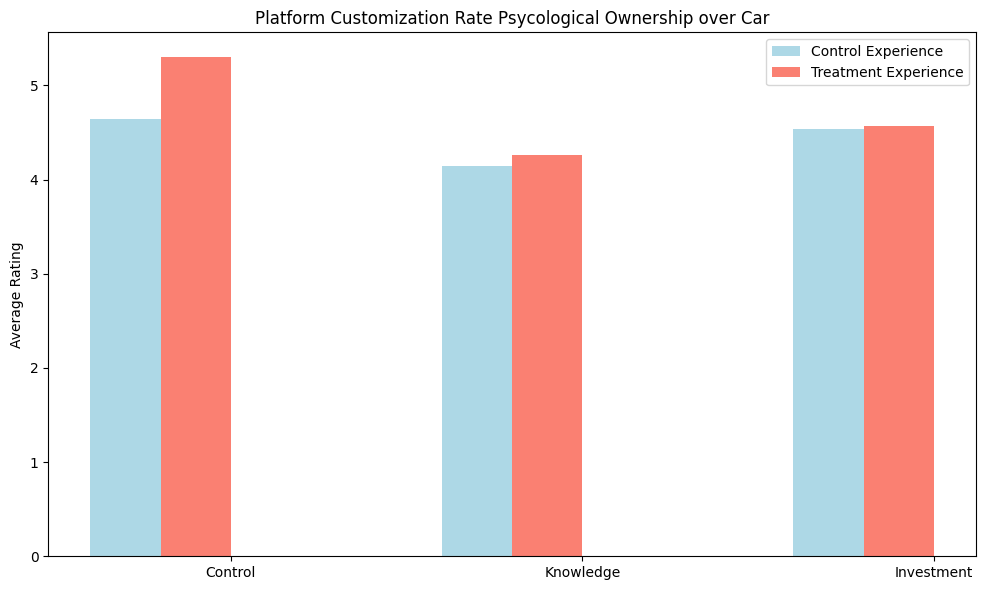

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data structure (replace with your aggregated data)
dvs = ['Control', 'Knowledge', 'Investment']
control = [4.641, 4.141, 4.538]  # Mean ratings for control group across DVs
treatment = [5.299, 4.260, 4.571]  # Mean ratings for treatment group


x = np.arange(len(dvs))  # X-axis positions for DVs
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each scenario
ax.bar(x - 1.5*width, control, width, label='Control Experience', color='lightblue')
ax.bar(x - 0.5*width, treatment, width, label='Treatment Experience', color='salmon')


# Formatting
ax.set_xticks(x)
ax.set_xticklabels(dvs)
ax.set_ylabel('Average Rating')
ax.set_title('Platform Customization Rate Psycological Ownership over Car')
ax.legend()
plt.tight_layout()
plt.show()

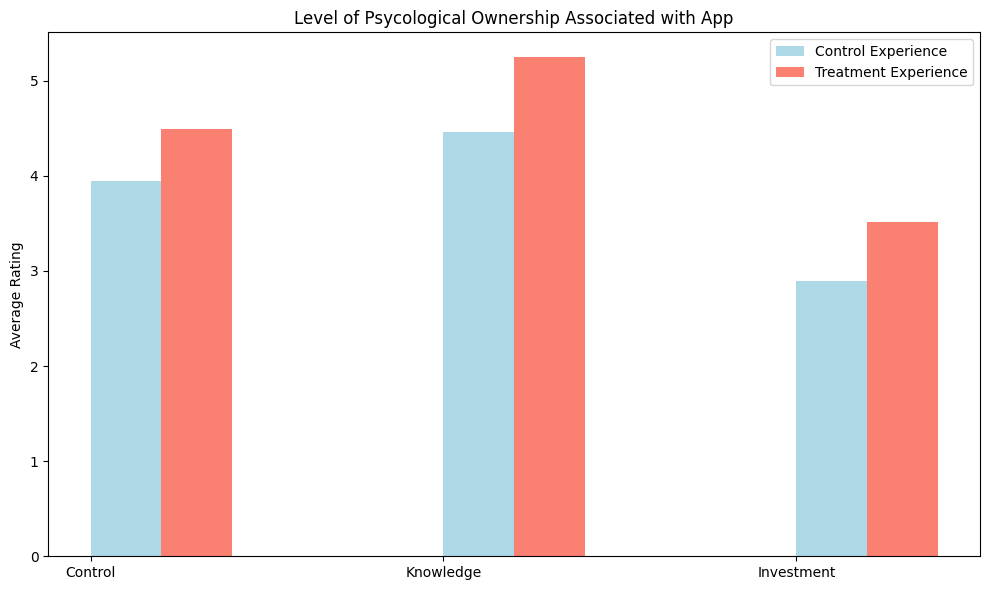

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data structure (replace with your aggregated data)
dvs = ['Control', 'Knowledge', 'Investment']

control_mod = [3.949, 4.462, 2.897]  # Control moderator
treatment_mod = [4.494, 5.247, 3.519]  # Treatment moderator

x = np.arange(len(dvs))  # X-axis positions for DVs
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each scenario
ax.bar(x + 0.5*width, control_mod, width, label='Control Experience', color='lightblue')
ax.bar(x + 1.5*width, treatment_mod, width, label='Treatment Experience', color='salmon')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(dvs)
ax.set_ylabel('Average Rating')
ax.set_title('Level of Psycological Ownership Associated with App')
ax.legend()
plt.tight_layout()
plt.show()

# T-Test

I will be doing an independent t-test

H0: There is a significant difference in rating between control and treatment
NULL: There is not a significant difference in ratings between control and treatment

Platform

In [ ]:
rideshare.head()

,Status,Progress,Duration (in seconds),Finished,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Check_App,Check_Exp,DV_StartConvo,DV_KeepConvo,DV_Tip,DV_Trash,DV_Spill,DV_Door,Own_Control_Car,Own_Know_Car,Own_Inv_Car,Own_Control_App,Own_Know_App,Own_Inv_App,Age,Gender,QID7_3_TEXT,Income,Addtl_Comments,Assigned_Scenario,Treatment,Mod_Platform,Mod_Exp,Scenario_Description
0,0,100,68,1,33.934,-117.885,anonymous,EN,5,4,2,3,3,5,5,5,5,4,4,5,3,3,36,2,<NA>,2,<NA>,3,1,0,1,Treatment Moderator: Experience (Customization)
1,0,100,74,1,38.752,-90.304,anonymous,EN,5,2,3,2,4,7,7,7,7,4,3,5,6,4,18,2,<NA>,4,<NA>,2,1,1,0,Treatment Moderator: Platform (Customization)
2,0,100,94,1,40.332,-74.055,anonymous,EN,2,2,1,7,4,7,7,7,4,4,4,2,6,1,29,1,<NA>,2,<NA>,1,0,0,1,Control Moderator: Experience (No Customization)
3,0,100,113,1,34.155,-118.596,anonymous,EN,3,3,3,4,4,1,7,7,3,3,3,3,3,1,46,2,<NA>,7,<NA>,0,0,1,0,Control Moderator: Platform (No Customization)
4,0,100,115,1,38.862,-77.266,anonymous,EN,1,1,2,2,4,4,7,7,4,6,4,1,5,1,46,1,<NA>,6,<NA>,1,0,0,1,Control Moderator: Experience (No Customization)


In [ ]:
print(rideshare['Assigned_Scenario'].unique())


<IntegerArray>
[3, 2, 1, 0]
Length: 4, dtype: Int64


Interface

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is called 'rideshare'
dvs = ['DV_StartConvo', 'DV_KeepConvo', 'DV_Tip', 'DV_Trash', 'DV_Spill', 'DV_Door']

results = []

for dv in dvs:
    control_vals = rideshare[rideshare['Assigned_Scenario'] == 0][dv].dropna()
    treatment_vals = rideshare[rideshare['Assigned_Scenario'] == 2][dv].dropna()

    t_stat, p_val = ttest_ind(control_vals, treatment_vals, equal_var=False)

    print(f"{dv} --> t = {t_stat:.3f}, p = {p_val:.4f}")

    results.append({
        'DV': dv,
        'Control Mean': control_vals.mean(),
        'Treatment Mean': treatment_vals.mean(),
        't-statistic': t_stat,
        'p-value': p_val
    })

# Optional: Save results to DataFrame
results_df = pd.DataFrame(results)


DV_StartConvo --> t = -2.590, p = 0.0105
DV_KeepConvo --> t = -1.122, p = 0.2636
DV_Tip --> t = -1.263, p = 0.2085
DV_Trash --> t = -0.068, p = 0.9456
DV_Spill --> t = 0.581, p = 0.5621
DV_Door --> t = 0.140, p = 0.8892


The treatment group rated "Start Conversation" significantly differently than the control group.

Experience

In [ ]:
control_vals = rideshare[rideshare['Assigned_Scenario'] == 1][dv].dropna()
treatment_vals = rideshare[rideshare['Assigned_Scenario'] == 3][dv].dropna()

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is called 'rideshare'
dvs = ['DV_StartConvo', 'DV_KeepConvo', 'DV_Tip', 'DV_Trash', 'DV_Spill', 'DV_Door']

results = []

for dv in dvs:
    control_vals = rideshare[rideshare['Assigned_Scenario'] == 1][dv].dropna()
    treatment_vals = rideshare[rideshare['Assigned_Scenario'] == 3][dv].dropna()

    t_stat, p_val = ttest_ind(control_vals, treatment_vals, equal_var=False)

    print(f"{dv} --> t = {t_stat:.3f}, p = {p_val:.4f}")

    results.append({
        'DV': dv,
        'Control Mean': control_vals.mean(),
        'Treatment Mean': treatment_vals.mean(),
        't-statistic': t_stat,
        'p-value': p_val
    })

# Optional: Save results to DataFrame
results_df = pd.DataFrame(results)


DV_StartConvo --> t = 1.427, p = 0.1557
DV_KeepConvo --> t = 1.000, p = 0.3187
DV_Tip --> t = 0.761, p = 0.4480
DV_Trash --> t = 0.096, p = 0.9235
DV_Spill --> t = -0.166, p = 0.8685
DV_Door --> t = 0.459, p = 0.6471


In [ ]:
#Not much significance going on here

In [ ]:
from google.colab import files
import subprocess

# Upload the .ipynb file
uploaded = files.upload()

# Get the uploaded file name
notebook_name = list(uploaded.keys())[0]

# Convert the notebook to HTML
subprocess.run(["jupyter", "nbconvert", "--to", "html", notebook_name])

# Download the HTML file
html_name = notebook_name.replace(".ipynb", ".html")
files.download(html_name)

Saving Rideshare_customization_project_GPCL (2).ipynb to Rideshare_customization_project_GPCL (2).ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>